<a href="https://colab.research.google.com/github/bjanni1/Course-activities/blob/main/Bjanni_A6_Radarchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
# create a dataframe for our alternative analysis matrix
df =pd.DataFrame(columns=['criteria','weight','ratingA','ratingB','scoreA','scoreB'])
print(df)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [2]:
#first step: add a list of criteria
df['criteria']=['improved productivity','Profitability','effort','complexity']
print(df)

                criteria weight ratingA ratingB scoreA scoreB
0  improved productivity    NaN     NaN     NaN    NaN    NaN
1          Profitability    NaN     NaN     NaN    NaN    NaN
2                 effort    NaN     NaN     NaN    NaN    NaN
3             complexity    NaN     NaN     NaN    NaN    NaN


In [3]:
df['weight']=[0.6,0.8,0.3,0.9]
print(df)

                criteria  weight ratingA ratingB scoreA scoreB
0  improved productivity     0.6     NaN     NaN    NaN    NaN
1          Profitability     0.8     NaN     NaN    NaN    NaN
2                 effort     0.3     NaN     NaN    NaN    NaN
3             complexity     0.9     NaN     NaN    NaN    NaN


In [6]:
df['ratingA']=[2,7,1,4]
df['ratingB']=[9,8,10,6]
#step 4: calculate partial scores by multiplying weight * ratings
for index,row in df.iterrows():
  df['scoreA'][index]=row['ratingA']*row['weight']
  df['scoreB'][index]=row['ratingB']*row['weight']

print(df)

                criteria  weight  ratingA  ratingB scoreA scoreB
0  improved productivity     0.6        2        9    1.2    5.4
1          Profitability     0.8        7        8    5.6    6.4
2                 effort     0.3        1       10    0.3    3.0
3             complexity     0.9        4        6    3.6    5.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
totalScoreA=0
totalScoreB=0
for index, row in df.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreB']

print ('the total score for A 1s {:.2f} and for B is {:.2f}'.format (totalScoreA, totalScoreB))

the total score for A 1s 10.70 and for B is 20.20


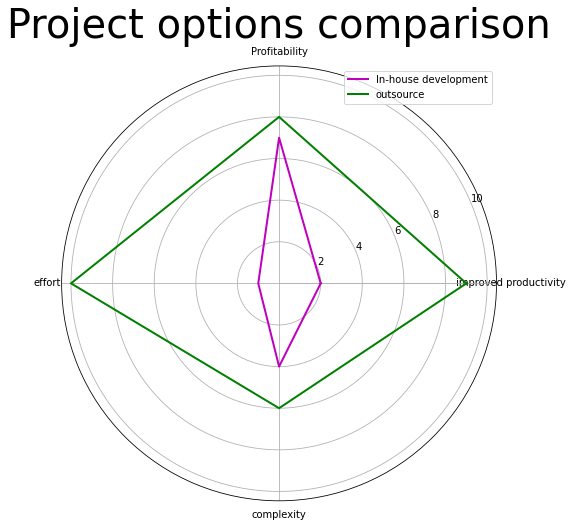

In [8]:
import numpy as np
import matplotlib.pyplot as plt
axisLocations = np.linspace(start=0, stop=2 * np.pi, num=len(df['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=df['ratingA']
ratingsB=df['ratingB']
ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations,ratingsACircular,'m-', linewidth=2, label='In-house development')
plt.plot(axisLocations,ratingsBCircular,'g-', linewidth=2, label='outsource')
plt.title('Project options comparison', size=40)
lines, labels =plt.thetagrids(np.degrees(axisLocations), labels=df['criteria'])
plt.legend()
plt.show()